In [1]:
!pip install torchviz==0.0.3 -q

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import dataloader, TensorDataset
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from torchviz import make_dot

#### Load dataset

In [3]:
iris = sns.load_dataset('iris')
iris.head(), iris.species.unique(), type(iris)

(   sepal_length  sepal_width  petal_length  petal_width species
 0           5.1          3.5           1.4          0.2  setosa
 1           4.9          3.0           1.4          0.2  setosa
 2           4.7          3.2           1.3          0.2  setosa
 3           4.6          3.1           1.5          0.2  setosa
 4           5.0          3.6           1.4          0.2  setosa,
 array(['setosa', 'versicolor', 'virginica'], dtype=object),
 pandas.core.frame.DataFrame)

In [4]:
X = iris.iloc[:, :-1].values
y = iris.iloc[:, -1].values
unique_clsses = iris.iloc[:, -1].unique()
X, y, unique_clsses, type(X), type(y)

# iris.values

(array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
        [5

In [5]:
for i in range(len(unique_clsses)):
    y[iris.species == unique_clsses[i]] = i
y = y.astype(int)
X, y

(array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
        [5

In [6]:
X.shape, y.shape

((150, 4), (150,))

#### Train test split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120,), (30,))

#### Transform to pytorch

In [8]:
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.long)
y_test = torch.tensor(y_test, dtype=torch.long)

#### Create Neural Network

In [9]:
class NN_Classifier(nn.Module):
    def __init__(self):
        super().__init__()

        self.input = nn.Linear(4, 32)
        self.fc = nn.Linear(32, 32)

        # Classification or output layer
        self.output = nn.Linear(32, 3)

    # Forward pass
    def forward(self, x):
        # pass data through input layer
        x = self.input(x)
        # hidden layer
        x = self.fc(x)
        # apply ReLU activation
        x = F.relu(x)

        # output layer
        x = self.output(x)
        # x = torch.sigmoid # using cross entropy loss (so not binary)
        return x

model = NN_Classifier()

#### Visualize computation graph (before training)

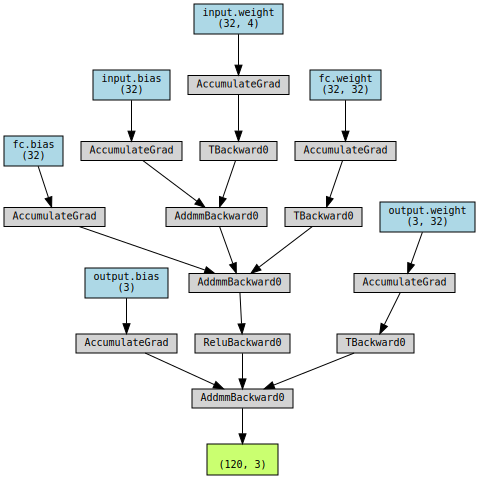

In [10]:
ypred = model(X_train)
make_dot(ypred, params=dict(model.named_parameters()))

In [11]:
learningRate = 0.01
lossfunc = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate,)

In [12]:
epochs = 3501
losses = torch.zeros(epochs)

for epoch in range(epochs):
    # Forward propagation
    ypred = model(X_train)
    loss = lossfunc(ypred, y_train)
    # Record the loss
    losses[epoch] = loss.detach()

    # Backward propagation
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()


    if epoch % 100 == 0:
        print(f'Epoch: {epoch}; Loss: {loss.item():.4f}')
    accuracy = 100*torch.mean((torch.argmax(ypred, axis=1) == y_train).float())

Epoch: 0; Loss: 1.0461
Epoch: 100; Loss: 0.5008
Epoch: 200; Loss: 0.3485
Epoch: 300; Loss: 0.2537
Epoch: 400; Loss: 0.1910
Epoch: 500; Loss: 0.1522
Epoch: 600; Loss: 0.1281
Epoch: 700; Loss: 0.1125
Epoch: 800; Loss: 0.1019
Epoch: 900; Loss: 0.0944
Epoch: 1000; Loss: 0.0889
Epoch: 1100; Loss: 0.0847
Epoch: 1200; Loss: 0.0814
Epoch: 1300; Loss: 0.0787
Epoch: 1400; Loss: 0.0766
Epoch: 1500; Loss: 0.0748
Epoch: 1600; Loss: 0.0733
Epoch: 1700; Loss: 0.0721
Epoch: 1800; Loss: 0.0710
Epoch: 1900; Loss: 0.0700
Epoch: 2000; Loss: 0.0692
Epoch: 2100; Loss: 0.0685
Epoch: 2200; Loss: 0.0678
Epoch: 2300; Loss: 0.0672
Epoch: 2400; Loss: 0.0667
Epoch: 2500; Loss: 0.0662
Epoch: 2600; Loss: 0.0658
Epoch: 2700; Loss: 0.0654
Epoch: 2800; Loss: 0.0650
Epoch: 2900; Loss: 0.0647
Epoch: 3000; Loss: 0.0644
Epoch: 3100; Loss: 0.0641
Epoch: 3200; Loss: 0.0638
Epoch: 3300; Loss: 0.0635
Epoch: 3400; Loss: 0.0633
Epoch: 3500; Loss: 0.0630


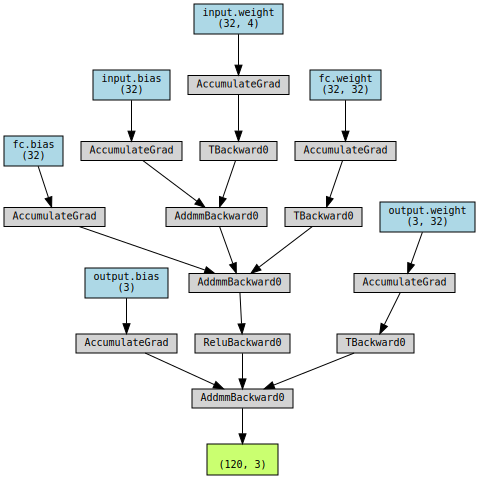

In [13]:
# Visualize computation graph (after training)
make_dot(ypred, params=dict(model.named_parameters()))

#### Loss vs Epoch

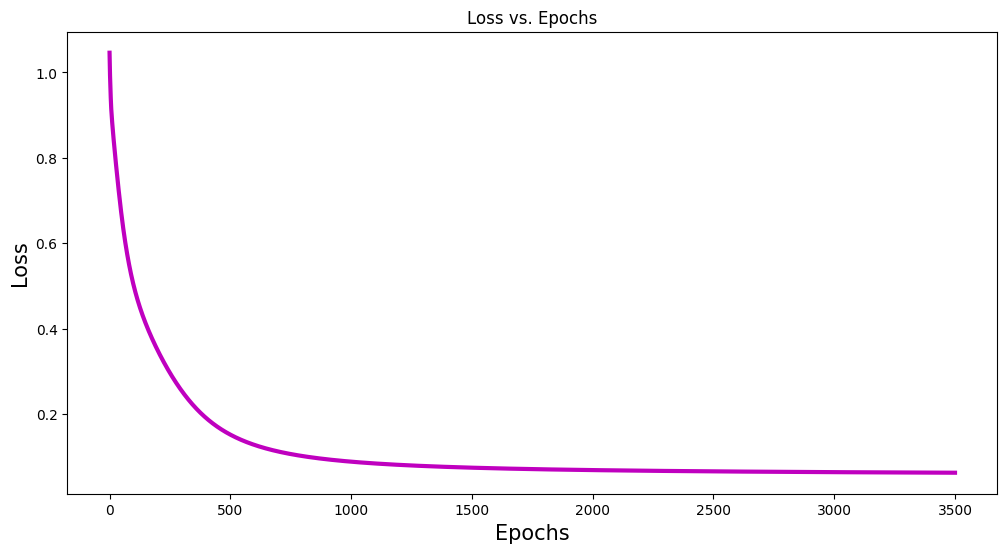

In [14]:
plt.figure(figsize=(12, 6))
plt.plot(np.arange(epochs), losses.detach(), 'm', lw=3)
plt.xlabel('Epochs', fontsize=15)
plt.ylabel('Loss', fontsize=15)
plt.title('Loss vs. Epochs')
plt.show()

#### Weights and Bias of training model

In [15]:
# We have 1 ip layer with 4 features; 1 hl; 1 op layer with 3 class
print(f"Trained Weight: {model.input.weight.detach().numpy()}")
print(f"Trained Bias: {model.input.bias.detach().numpy()}")

Trained Weight: [[-0.09326012 -0.21269782 -0.29053646  0.5728669 ]
 [-0.25491175 -0.18962158 -0.62251836 -0.33820555]
 [-0.29137942  0.30349043  0.5539943   0.42556858]
 [-0.11303382  0.5555003  -0.34047604  0.06952669]
 [-0.3717326  -0.22727427  0.18475413  0.12020467]
 [-0.03517621  0.3422471  -0.59408647 -0.13173656]
 [ 0.47102413  0.14835279  0.28597355  0.51534903]
 [ 0.2787222   0.18957138 -0.12680992 -0.34830233]
 [-0.06609166 -0.5465624  -0.15820101 -0.10795549]
 [ 0.31532133 -0.47867236 -0.2994279  -0.41228968]
 [ 0.033966   -0.36891216  0.553015    0.56130236]
 [ 0.1026805  -0.28484306 -0.15169978 -0.3624042 ]
 [-0.36733246  0.17244773 -0.2747125  -0.04439698]
 [ 0.54063153 -0.24327144 -0.29905778 -0.47390097]
 [ 0.14012206 -0.04096642 -0.05220153  0.5562627 ]
 [-0.35902393  0.08652297  0.2707654   0.42514864]
 [ 0.2558152  -0.14488788 -0.15374562  0.41060093]
 [ 0.1606852   0.07610745  0.4394772   0.51430535]
 [-0.42580456 -0.60936284  0.68261313  0.37302223]
 [ 0.37004736 -

#### Testing and evaluating the model

In [26]:
y_pred = model(X_test)
y_pred

tensor([[ -4.3294,   5.4277,   0.9463],
        [ 16.7165,   8.8742, -22.6165],
        [-16.7872,   2.9586,  15.5463],
        [ -4.5973,   5.1043,   1.3853],
        [ -4.2903,   5.8287,   0.6193],
        [ 15.2899,   8.1834, -20.7304],
        [  0.1031,   5.8253,  -3.9933],
        [ -8.8352,   4.3591,   6.2586],
        [ -6.6575,   4.4243,   4.0659],
        [ -1.2594,   5.7466,  -2.5193],
        [ -7.9080,   4.5420,   5.1902],
        [ 14.4536,   7.6481, -19.5129],
        [ 16.9425,   8.7616, -22.7970],
        [ 14.5964,   7.7936, -19.7465],
        [ 16.1699,   8.4258, -21.7972],
        [ -4.0291,   5.6071,   0.4178],
        [-12.9225,   3.1764,  11.3991],
        [ -1.9153,   5.4546,  -1.6192],
        [ -4.6437,   4.9624,   1.5622],
        [-12.7276,   3.0268,  11.2857],
        [ 13.7191,   7.5618, -18.7232],
        [ -7.5026,   4.3640,   4.9125],
        [ 14.1179,   7.7911, -19.2959],
        [-12.3984,   3.1819,  10.8689],
        [ -9.4108,   5.6548,   6.0562],
